In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("energydata_complete.csv")
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [3]:
df.shape

(19735, 29)

<function matplotlib.pyplot.show(close=None, block=None)>

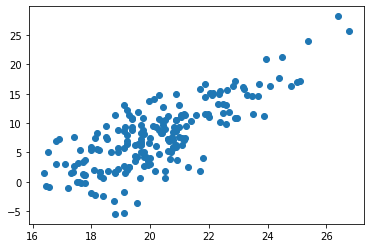

In [4]:
#Qs12 From the dataset, fit a linear model on the relationship between the temperature in the living room in Celsius (x = T2) and the temperature outside the building (y = T6). What is the R^2 value in two d.p.?
cdf=df[['T2','T6']].sample(200,random_state=42)
plt.scatter(cdf.T2,cdf.T6)
plt.show

In [5]:
msk = np.random.rand(len(cdf)) < 0.8
train = cdf[msk]
test = cdf[~msk]
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['T2']])
train_y = np.asanyarray(train[['T6']])
regr.fit(train_x, train_y)

LinearRegression()

In [6]:
from sklearn.metrics import r2_score
test_x = np.asanyarray(test[['T2']])
test_y = np.asanyarray(test[['T6']])
test_y_ = regr.predict(test_x)
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

R2-score: 0.50


In [7]:
#Qs 13 Normalize the dataset using the MinMaxScaler after removing the following columns: [“date”, “lights”]. The target variable is “Appliances”. Use a 70-30 train-test set split with a random state of 42 (for reproducibility). Run a multiple linear regression using the training set and evaluate your model on the test set. Answer the following questions:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df = df.drop(columns=["date", "lights"])
normalised_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
features_df = normalised_df.drop(columns=['Appliances'])
heating_target = normalised_df['Appliances']

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_df, heating_target,test_size=0.3, random_state=42)
reg2 = linear_model.LinearRegression()
reg2.fit(x_train, y_train)
predicted_values = reg2.predict(x_test)

In [9]:
#What is the Mean Absolute Error (in two decimal places)?
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predicted_values)
round(mae,3)

0.05

In [10]:
# Qs14 Residual Sum of Squares (RSS) 
rss = np.sum(np.square(y_test - predicted_values))
print(round(rss, 3))
#Qs15 Root Mean Square Error (RMSE) 
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
print(round(rmse, 3))
#Qs16 R-Squared 
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, predicted_values)
print(round(r2_score, 3))

45.348
0.088
0.149


In [11]:
#Obtain the feature weights from your linear model above. Which features have the lowest and highest weights respectively?
def get_weights_df(model, feat, col_name):
    weights = pd.Series(model.coef_, feat.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns = ['Features', col_name]
    weights_df[col_name].round(3)
    return weights_df
linear_model_weights = get_weights_df(reg2, x_train, 'Linear_Model_Weight')
print(linear_model_weights)

       Features  Linear_Model_Weight
0          RH_2            -0.456698
1         T_out            -0.321860
2            T2            -0.236178
3            T9            -0.189941
4          RH_8            -0.157595
5        RH_out            -0.077671
6          RH_7            -0.044614
7          RH_9            -0.039800
8            T5            -0.015657
9            T1            -0.003281
10          rv2             0.000770
11          rv1             0.000770
12  Press_mm_hg             0.006839
13           T7             0.010319
14   Visibility             0.012307
15         RH_5             0.016006
16         RH_4             0.026386
17           T4             0.028981
18    Windspeed             0.029183
19         RH_6             0.038049
20         RH_3             0.096048
21           T8             0.101995
22    Tdewpoint             0.117758
23           T6             0.236425
24           T3             0.290627
25         RH_1             0.553547


In [12]:
#Qs18 Train a ridge regression model with an alpha value of 0.4. Is there any change to the root mean squared error (RMSE) when evaluated on the test set?
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.4)
ridge_reg.fit(x_train, y_train)
yhat=ridge_reg.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, yhat))
print(round(rmse, 3))

0.088


In [13]:
#Qs19 Train a lasso regression model with an alpha value of 0.001 and obtain the new feature weights with it. How many of the features have non-zero feature weights?
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)
def get_weights_df(model, feat, col_name):
    weights = pd.Series(model.coef_, feat.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns = ['Features', col_name]
    weights_df[col_name].round(3)
    return weights_df
lasso_weights_df = get_weights_df(lasso_reg, x_train, 'Lasso_weight')
print(lasso_weights_df)

       Features  Lasso_weight
0        RH_out     -0.049557
1          RH_8     -0.000110
2            T1      0.000000
3     Tdewpoint      0.000000
4    Visibility      0.000000
5   Press_mm_hg     -0.000000
6         T_out      0.000000
7          RH_9     -0.000000
8            T9     -0.000000
9            T8      0.000000
10         RH_7     -0.000000
11          rv1     -0.000000
12           T7     -0.000000
13           T6      0.000000
14         RH_5      0.000000
15           T5     -0.000000
16         RH_4      0.000000
17           T4     -0.000000
18         RH_3      0.000000
19           T3      0.000000
20         RH_2     -0.000000
21           T2      0.000000
22         RH_6     -0.000000
23          rv2     -0.000000
24    Windspeed      0.002912
25         RH_1      0.017880


In [14]:
#Qs20 What is the new RMSE with the lasso regression? (Answer should be in three (3) decimal places)
yhat1=lasso_reg.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, yhat1))
print(round(rmse, 3))

0.094
